<a href="https://colab.research.google.com/github/niloufareshghi/Machine-Learning-In-Data-Science-Course/blob/main/UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 1000 # we initially selected 10000(whole dataset) but even with 1000 rounds the UCB model can still identify the best ad
# it did not work with 500 rounds
d = 10
selected_ads = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(N):
  ad = 0
  max_ub = 0
  for i in range(d):
    if numbers_of_selections[i] != 0:
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta = math.sqrt(1.5 * math.log(n + 1)/numbers_of_selections[i])
      upper_bound = average_reward + delta
    else:
      upper_bound = 1e400
    if upper_bound > max_ub:
      max_ub = upper_bound
      ad = i
  selected_ads.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_reward += reward

## Visualising the results

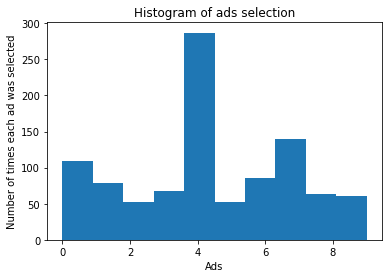

In [4]:
plt.hist(selected_ads)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()